In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
message_depth = 6

basic_logs_path = f'./research/logs/basic/{message_depth}/steganoGAN_basic.csv'
residual_logs_path = f'./research/logs/residual/{message_depth}/steganoGAN_residual.csv'
dense_logs_path = f'./research/logs/dense/{message_depth}/steganoGAN_dense.csv'

critic_basic_logs_path = f'./research_critic/logs/basic/{message_depth}/steganoGAN_basic.csv'
critic_residual_logs_path = f'./research_critic/logs/residual/{message_depth}/steganoGAN_residual.csv'
critic_dense_logs_path = f'./research_critic/logs/dense/{message_depth}/steganoGAN_dense.csv'

In [23]:
# Function to read log files and extract metrics
def read_logs(log_path):
    df = pd.read_csv(log_path)
    return df

In [24]:
# Read the log files
basic_logs = read_logs(basic_logs_path)
residual_logs = read_logs(residual_logs_path)
dense_logs = read_logs(dense_logs_path)

critic_basic_logs = read_logs(critic_basic_logs_path)
critic_residual_logs = read_logs(critic_residual_logs_path)
critic_dense_logs = read_logs(critic_dense_logs_path)

In [25]:
def plot_metric(metric):
  plt.figure(figsize=(10, 6))

  plt.plot(basic_logs['epoch'], basic_logs[metric], label='Basic Logs', linestyle='--')
  plt.plot(residual_logs['epoch'], residual_logs[metric], label='Residual Logs', linestyle='--')
  plt.plot(dense_logs['epoch'], dense_logs[metric], label='Dense Logs', linestyle='--')
  plt.plot(critic_basic_logs['epoch'], critic_basic_logs[metric], label='Critic Basic Logs')
  plt.plot(critic_residual_logs['epoch'], critic_residual_logs[metric], label='Critic Residual Logs')
  plt.plot(critic_dense_logs['epoch'], critic_dense_logs[metric], label='Critic Dense Logs')

  plt.xlabel('Epoch')
  plt.ylabel(metric.replace('_', ' ').upper())
  plt.title(f'{metric.replace("_", " ").upper()} Metric Logs')
  plt.legend(bbox_to_anchor=(1,1), loc="upper left")
  plt.grid(True)
  plt.xticks(np.arange(min(critic_basic_logs['epoch']), max(critic_basic_logs['epoch']) + 1, 1))
  plt.show()

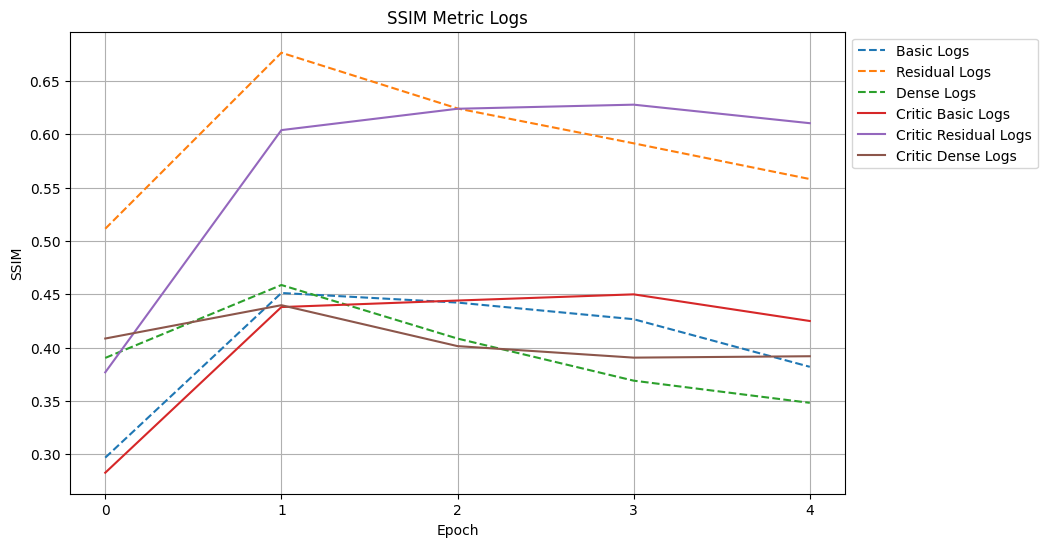

In [26]:
plot_metric('ssim')

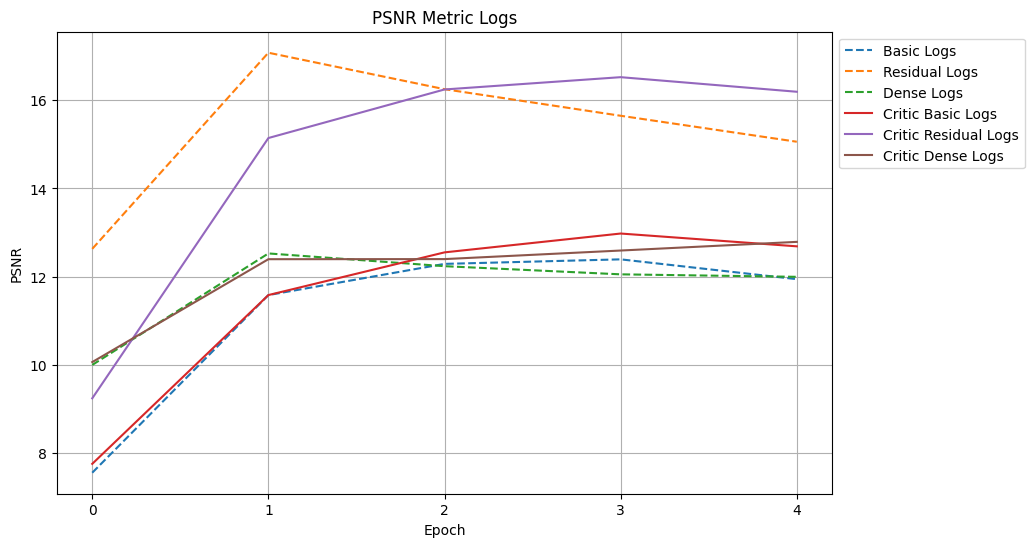

In [27]:
plot_metric('psnr')

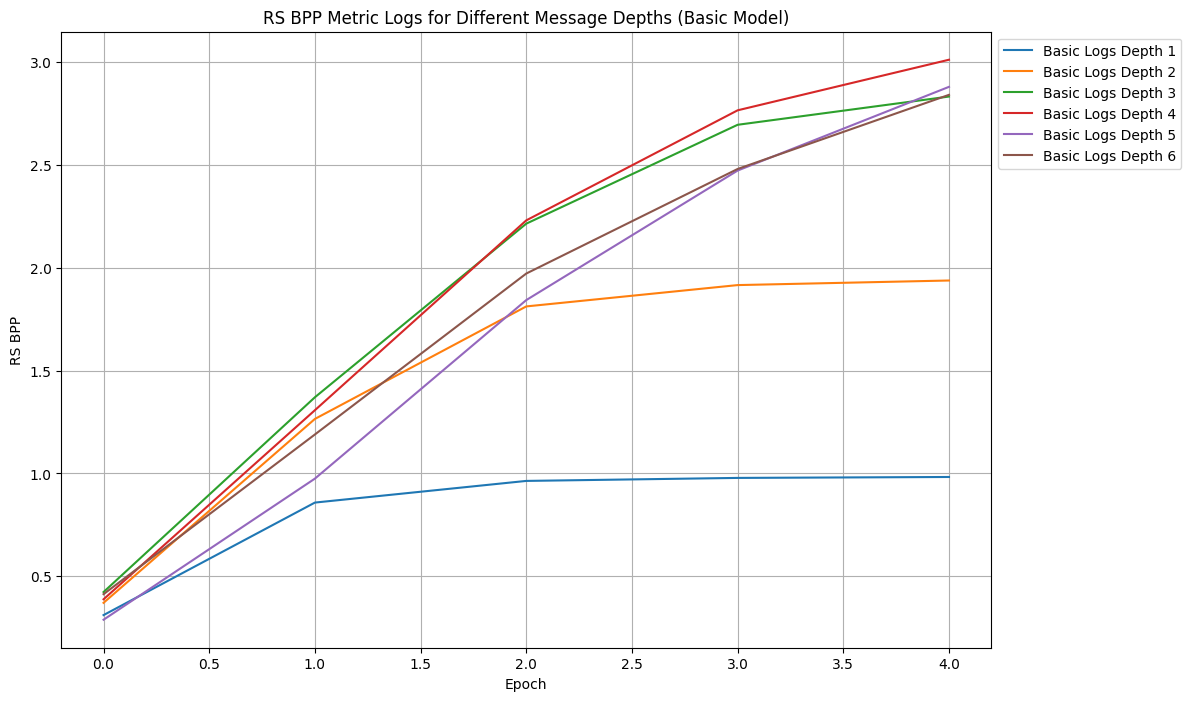

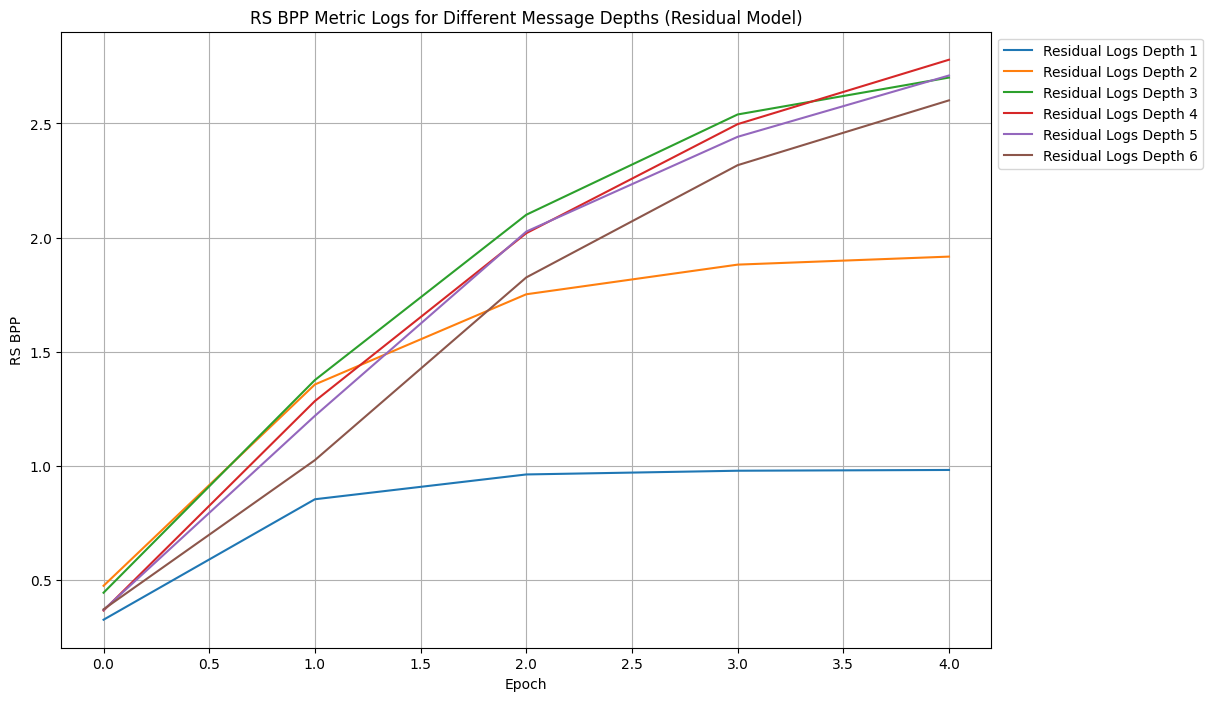

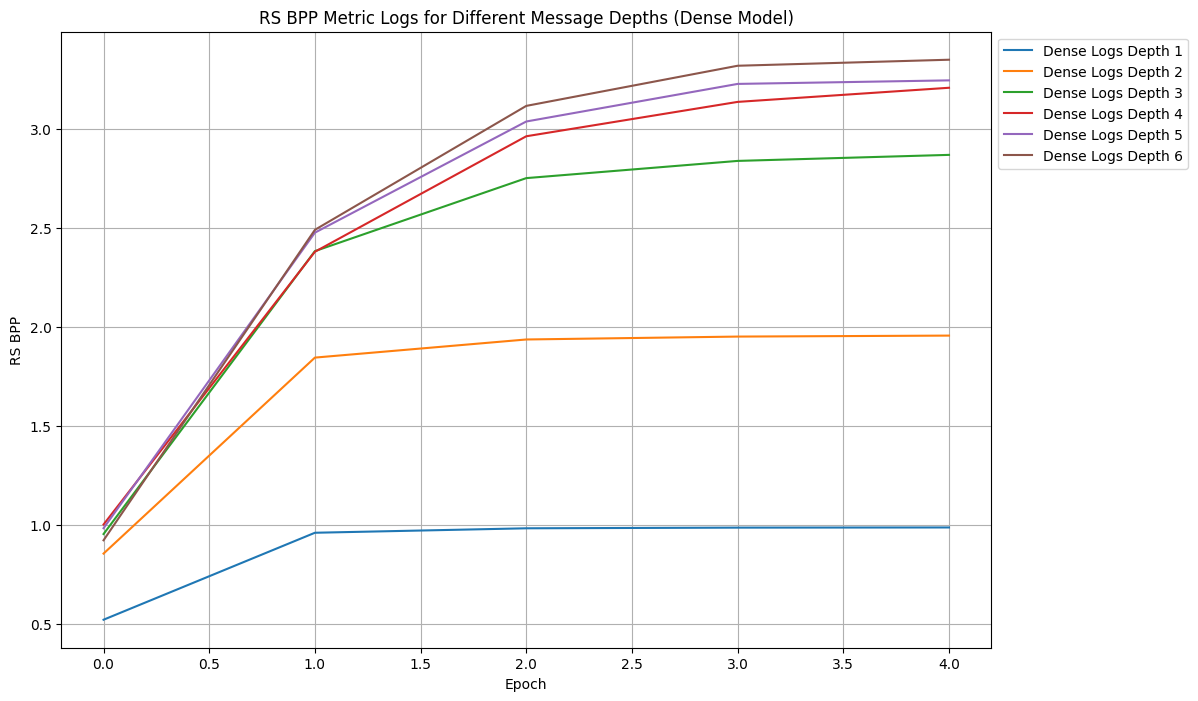

In [28]:
def plot_rs_bpp_for_model(model_type):
  # Define the range of message depths
  message_depths = range(1, 7)

  # Initialize a figure
  plt.figure(figsize=(12, 8))

  # Loop through each message depth
  for depth in message_depths:
    # Define the file path for each depth based on the model type
    critic_logs_path = f'./research_critic/logs/{model_type}/{depth}/steganoGAN_{model_type}.csv'
    
    # Read the log files
    critic_logs = read_logs(critic_logs_path)
    
    # Plot the rs_bpp metric for each log
    plt.plot(critic_logs['epoch'], critic_logs['rs_bpp'], label=f'{model_type.capitalize()} Logs Depth {depth}')

  # Customize the plot
  plt.xlabel('Epoch')
  plt.ylabel('RS BPP')
  plt.title(f'RS BPP Metric Logs for Different Message Depths ({model_type.capitalize()} Model)')
  plt.legend(bbox_to_anchor=(1,1), loc="upper left")
  plt.grid(True)
  plt.show()

# Example usage:
plot_rs_bpp_for_model('basic')
plot_rs_bpp_for_model('residual')
plot_rs_bpp_for_model('dense')

In [29]:
def plot_metric_for_all_depths(metric):
  # Define the range of message depths
  message_depths = range(1, 7)

  # Initialize a figure
  plt.figure(figsize=(12, 8))

  # Loop through each message depth
  for depth in message_depths:
    # Define the file path for each depth
    critic_basic_logs_path = f'./research_critic/logs/basic/{depth}/steganoGAN_basic.csv'
    critic_residual_logs_path = f'./research_critic/logs/residual/{depth}/steganoGAN_residual.csv'
    critic_dense_logs_path = f'./research_critic/logs/dense/{depth}/steganoGAN_dense.csv'

    # Read the log files
    critic_basic_logs = read_logs(critic_basic_logs_path)
    critic_residual_logs = read_logs(critic_residual_logs_path)
    critic_dense_logs = read_logs(critic_dense_logs_path)

    # Plot the specified metric for each log
    plt.plot(critic_basic_logs['epoch'], critic_basic_logs[metric], label=f'Basic Logs Depth {depth}', linestyle='dotted')
    plt.plot(critic_residual_logs['epoch'], critic_residual_logs[metric], label=f'Residual Logs Depth {depth}', linestyle='dashed')
    plt.plot(critic_dense_logs['epoch'], critic_dense_logs[metric], label=f'Dense Logs Depth {depth}')

  # Customize the plot
  plt.xlabel('Epoch')
  plt.ylabel(metric.replace('_', ' ').upper())
  plt.title(f'{metric.replace("_", " ").upper()} Metric Logs for Different Message Depths')
  plt.legend(bbox_to_anchor=(1,1), loc="upper left")
  plt.grid(True)
  plt.xticks(np.arange(min(critic_basic_logs['epoch']), max(critic_basic_logs['epoch']) + 1, 1))
  plt.show()

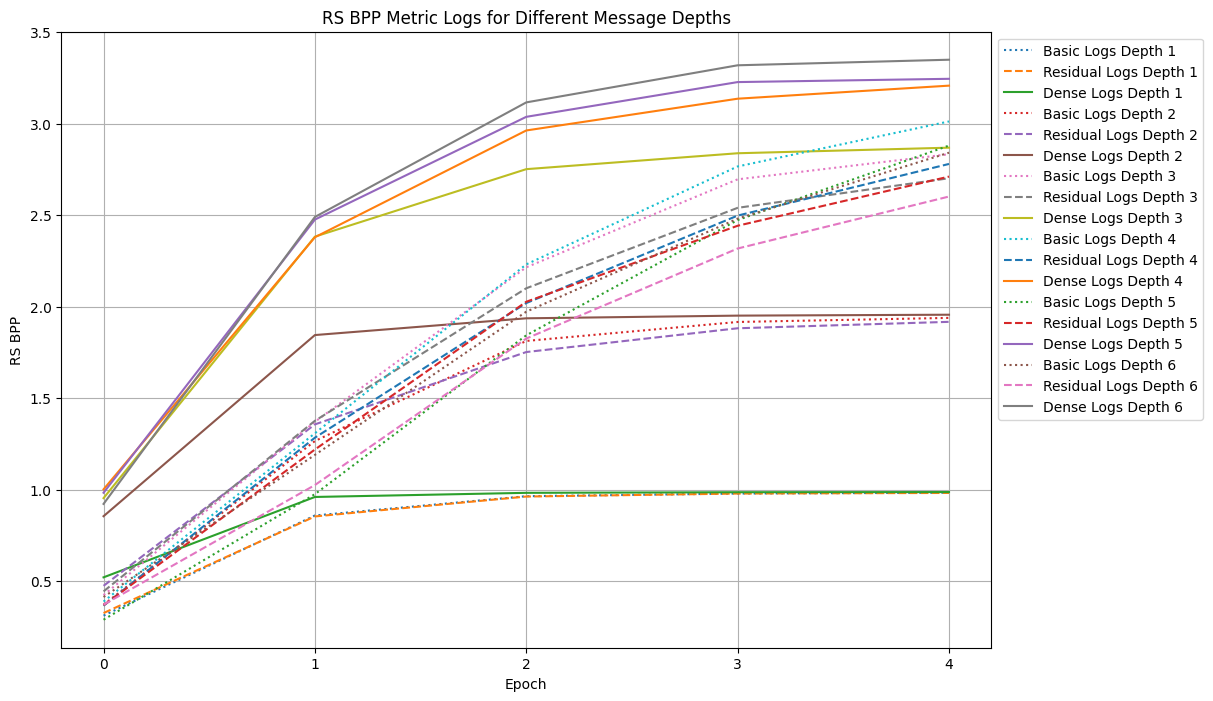

In [30]:
plot_metric_for_all_depths('rs_bpp')

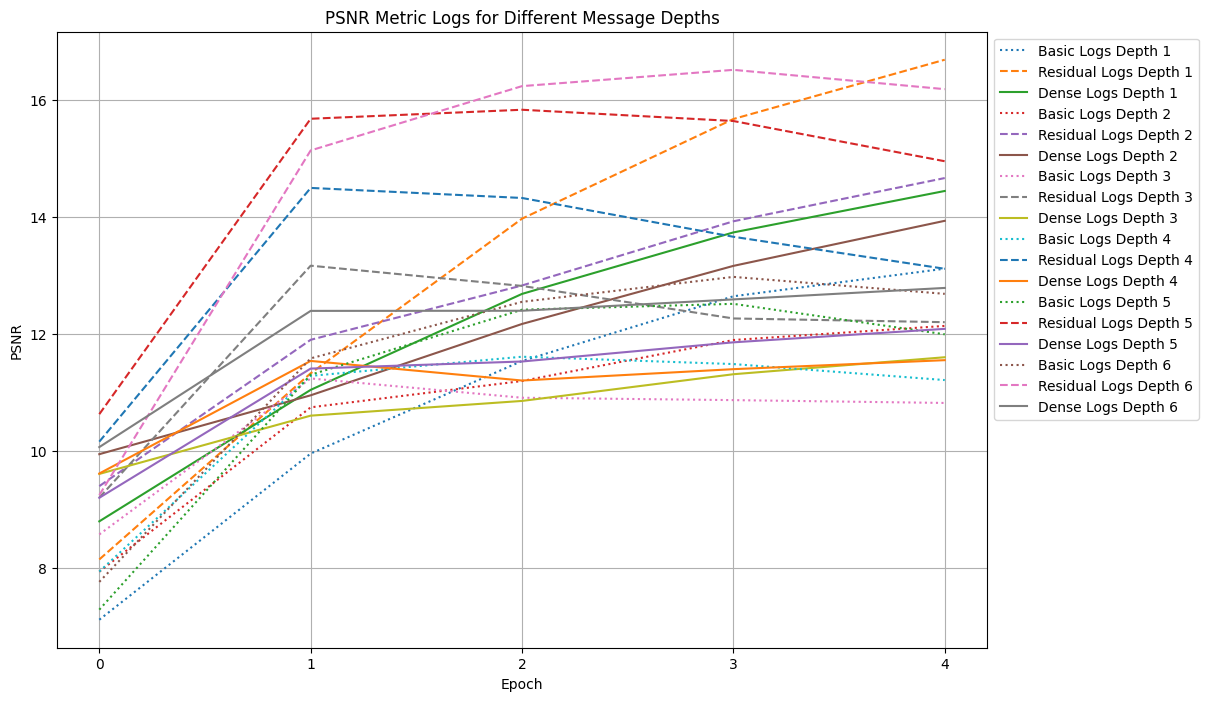

In [31]:
plot_metric_for_all_depths('psnr')

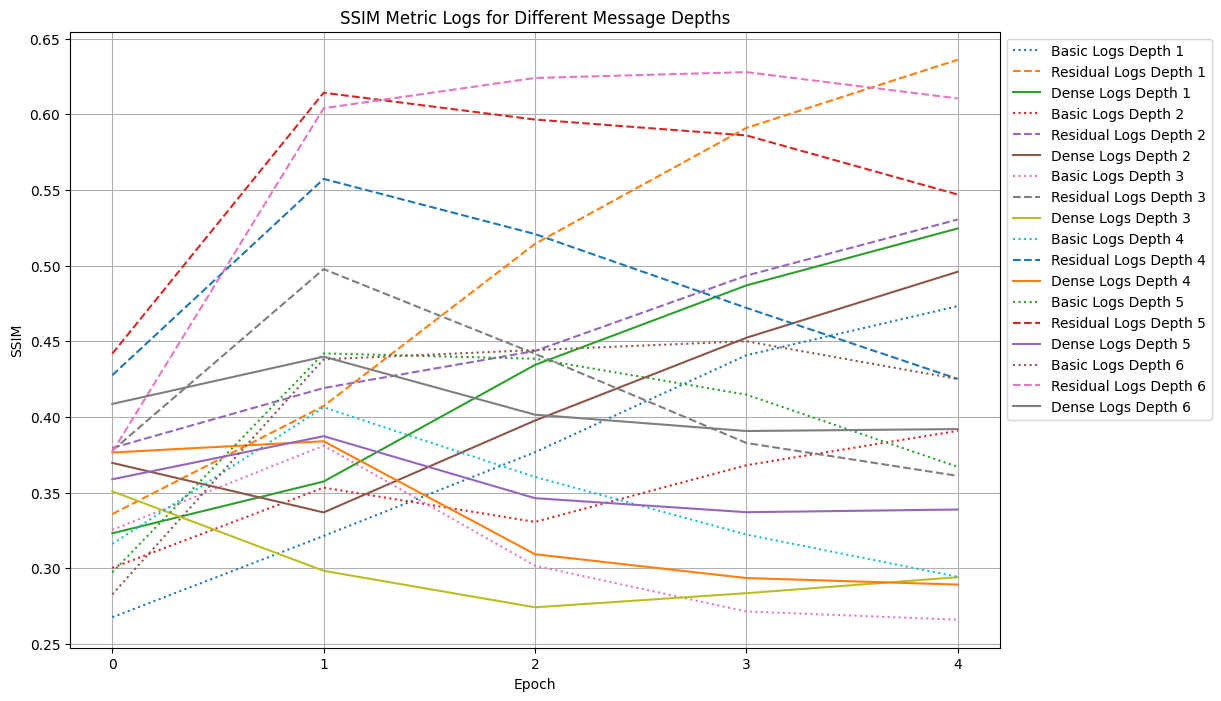

In [32]:
plot_metric_for_all_depths('ssim')

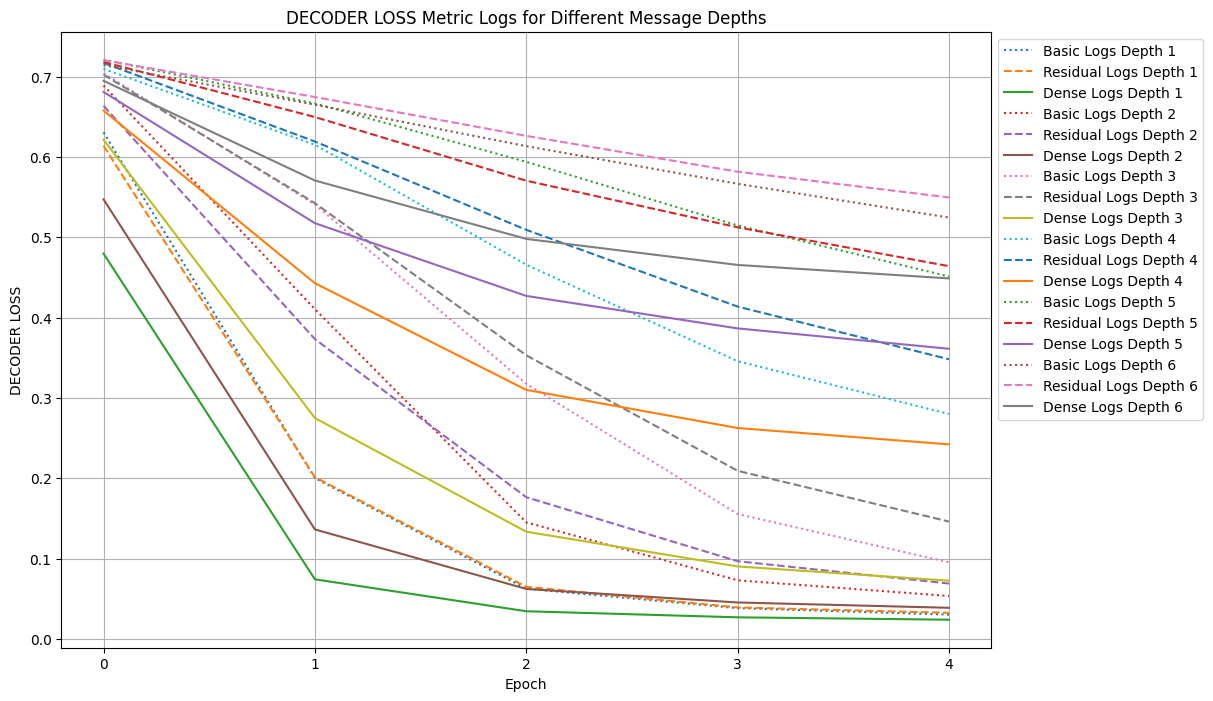

In [33]:
plot_metric_for_all_depths('decoder_loss')

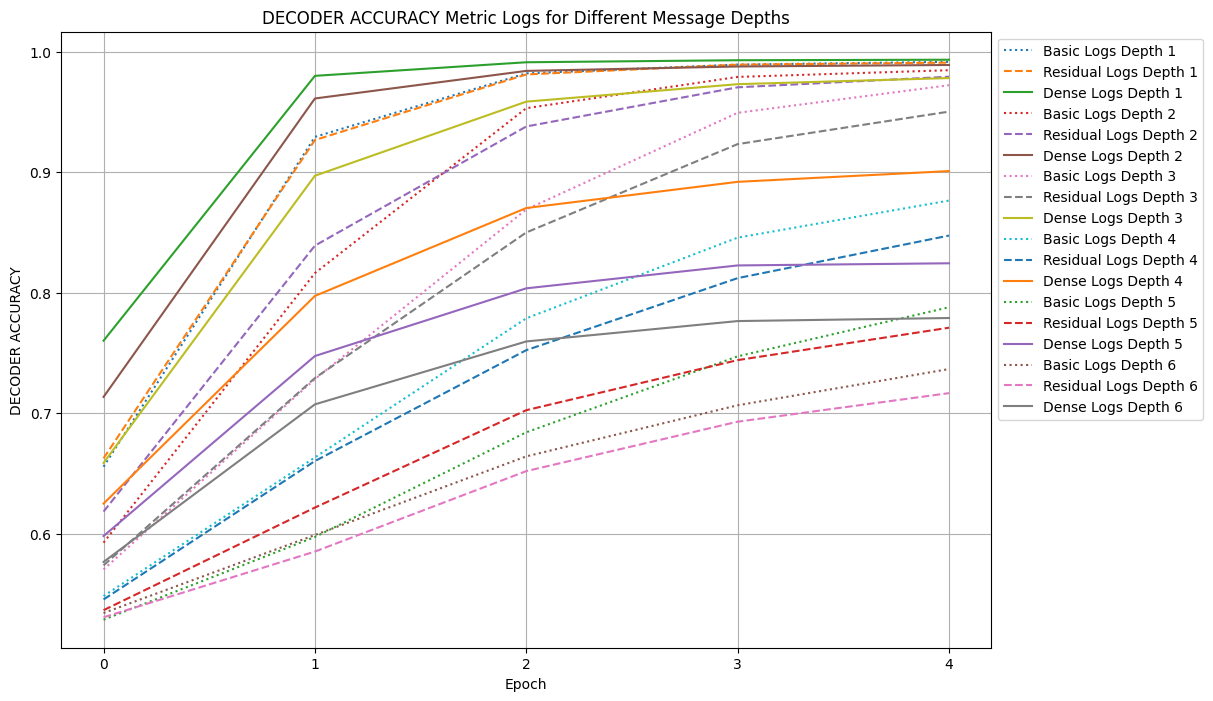

In [34]:
plot_metric_for_all_depths('decoder_accuracy')

In [35]:
# for each critic model make table of decoder_accuracy, rs-bpp, psnr, ssim on last epoch
def get_metrics_for_last_epoch_critic(model_type):
  # Define the range of message depths
  message_depths = range(1, 7)

  # Initialize a dictionary to store the metrics
  metrics = {
    'Depth': [],
    'Decoder Accuracy': [],
    'RS BPP': [],
    'PSNR': [],
    'SSIM': []
  }

  # Loop through each message depth
  for depth in message_depths:
    # Define the file path for each depth
    critic_logs_path = f'./research_critic/logs/{model_type}/{depth}/steganoGAN_{model_type}.csv'

    # Read the log files
    critic_logs = read_logs(critic_logs_path)

    # Get the metrics for the last epoch
    last_epoch = critic_logs.iloc[-1]

    # Store the metrics in the dictionary
    metrics['Depth'].append(depth)
    metrics['Decoder Accuracy'].append(last_epoch['decoder_accuracy'])
    metrics['RS BPP'].append(last_epoch['rs_bpp'])
    metrics['PSNR'].append(last_epoch['psnr'])
    metrics['SSIM'].append(last_epoch['ssim'])

  # Convert the dictionary to a DataFrame
  metrics_df = pd.DataFrame(metrics)

  return metrics_df

In [36]:
get_metrics_for_last_epoch_critic('basic')

,Depth,Decoder Accuracy,RS BPP,PSNR,SSIM
0,1,0.991415,0.982829,13.117994,0.473173
1,2,0.984489,1.937957,12.138257,0.390786
2,3,0.972045,2.832267,10.819562,0.265963
3,4,0.876409,3.011268,11.211303,0.294330
4,5,0.787943,2.879432,11.994433,0.367002
5,6,0.736717,2.840599,12.687182,0.425008


In [39]:
get_metrics_for_last_epoch_critic('residual')

,Depth,Decoder Accuracy,RS BPP,PSNR,SSIM
0,1,0.990779,0.981558,16.694548,0.636058
1,2,0.979097,1.916386,14.669198,0.530476
2,3,0.950159,2.700956,12.202073,0.361016
3,4,0.847384,2.779074,13.116198,0.425066
4,5,0.771000,2.710003,14.956861,0.546964
5,6,0.716753,2.601038,16.190727,0.610473


In [40]:
get_metrics_for_last_epoch_critic('dense')

,Depth,Decoder Accuracy,RS BPP,PSNR,SSIM
0,1,0.993185,0.986370,14.447945,0.524548
1,2,0.988821,1.955282,13.937207,0.495941
2,3,0.977986,2.867922,11.601906,0.294056
3,4,0.900853,3.206822,11.551915,0.289179
4,5,0.824416,3.244164,12.087803,0.338802
5,6,0.779038,3.348446,12.788334,0.391969


In [41]:
# for each non critic model make table of decoder_accuracy, rs-bpp, psnr, ssim on last epoch
def get_metrics_for_last_epoch(model_type):
  # Define the range of message depths
  message_depths = range(1, 7)

  # Initialize a dictionary to store the metrics
  metrics = {
    'Depth': [],
    'Decoder Accuracy': [],
    'RS BPP': [],
    'PSNR': [],
    'SSIM': []
  }

  # Loop through each message depth
  for depth in message_depths:
    # Define the file path for each depth
    critic_logs_path = f'./research/logs/{model_type}/{depth}/steganoGAN_{model_type}.csv'

    # Read the log files
    critic_logs = read_logs(critic_logs_path)

    # Get the metrics for the last epoch
    last_epoch = critic_logs.iloc[-1]

    # Store the metrics in the dictionary
    metrics['Depth'].append(depth)
    metrics['Decoder Accuracy'].append(last_epoch['decoder_accuracy'])
    metrics['RS BPP'].append(last_epoch['rs_bpp'])
    metrics['PSNR'].append(last_epoch['psnr'])
    metrics['SSIM'].append(last_epoch['ssim'])

  # Convert the dictionary to a DataFrame
  metrics_df = pd.DataFrame(metrics)

  return metrics_df

In [42]:
get_metrics_for_last_epoch('basic')

,Depth,Decoder Accuracy,RS BPP,PSNR,SSIM
0,1,0.994811,0.989623,12.342726,0.423683
1,2,0.990780,1.963119,11.621408,0.352907
2,3,0.971407,2.828441,10.784581,0.268835
3,4,0.885303,3.082420,10.669668,0.250391
4,5,0.797967,2.979666,11.647204,0.351245
5,6,0.751835,3.022016,11.943018,0.382051


In [43]:
get_metrics_for_last_epoch('residual')

,Depth,Decoder Accuracy,RS BPP,PSNR,SSIM
0,1,0.994568,0.989135,15.626433,0.592121
1,2,0.990028,1.960113,14.061930,0.505409
2,3,0.957905,2.747432,11.553494,0.315977
3,4,0.831834,2.654676,12.935678,0.435858
4,5,0.784029,2.840290,13.628426,0.472160
5,6,0.733216,2.798585,15.057843,0.558108


In [45]:
get_metrics_for_last_epoch('dense')

,Depth,Decoder Accuracy,RS BPP,PSNR,SSIM
0,1,0.995968,0.991935,14.827600,0.555191
1,2,0.992359,1.969435,13.121807,0.458182
2,3,0.983635,2.901808,10.996737,0.270660
3,4,0.902840,3.222718,10.801527,0.248222
4,5,0.837371,3.373707,11.609079,0.305154
5,6,0.785459,3.425504,11.995933,0.348285


In [73]:
# create one picture from 16 pictures
# first row - original images resized to 128x128 pixels from ./images/callback/ (images must be resized to 128x128 pixels with tensorflow)
# second row - steganographed images with message from ./research_critic/epoch_images/dense/6/epoch_5_images
# dont use plt, use np for image creation

# paths examples:
# image_path = f'./images/callback/image{i}.png'
# steganographed_image_path = f'./research_critic/epoch_images/dense/6/epoch_5_images/stego_image{i}.png'

import tensorflow as tf
import numpy as np
from PIL import Image

# Function to load and resize an image
def load_and_resize_image(image_path, size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, size)
    image = tf.cast(image, tf.uint8)
    return image.numpy()

# Paths to the images
original_image_paths = [f'./images/callback/image{i}.png' for i in range(1, 9)]
steganographed_image_paths = [f'./research_critic/epoch_images/dense/6/epoch_5_images/stego_image{i}.png' for i in range(1, 9)]

# Load and resize the images
original_images = [load_and_resize_image(path) for path in original_image_paths]
steganographed_images = [load_and_resize_image(path) for path in steganographed_image_paths]

# Combine images into a single image
combined_image = np.zeros((256, 1024, 3), dtype=np.uint8)  # 2 rows, 8 columns, 128x128 each

# Place original images in the first row
for i in range(8):
    combined_image[0:128, i*128:(i+1)*128, :] = original_images[i]

# Place steganographed images in the second row
for i in range(8):
    combined_image[128:256, i*128:(i+1)*128, :] = steganographed_images[i]

# Save the combined image
combined_image_pil = Image.fromarray(combined_image)
combined_image_pil.save('combined_image.png')

In [74]:
# create one picture from 24 pictures
# first row - original images resized to 128x128 pixels from ./images/callback/ (images must be resized to 128x128 pixels with tensorflow)
# second row - steganographed images with message from ./research_critic/epoch_images/dense/6/epoch_5_images
# third row - difference between original and steganographed images
# dont use plt, use np for image creation

# paths examples:
# image_path = f'./images/callback/image{i}.png'
# steganographed_image_path = f'./research_critic/epoch_images/dense/6/epoch_5_images/stego_image{i}.png'

import tensorflow as tf
import numpy as np
from PIL import Image

# Function to load and resize an image
def load_and_resize_image(image_path, size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, size)
    image = tf.cast(image, tf.uint8)
    return image.numpy()

# Paths to the images
original_image_paths = [f'./images/callback/image{i}.png' for i in range(1, 9)]
steganographed_image_paths = [f'./research_critic/epoch_images/dense/6/epoch_5_images/stego_image{i}.png' for i in range(1, 9)]

# Load and resize the images
original_images = [load_and_resize_image(path) for path in original_image_paths]
steganographed_images = [load_and_resize_image(path) for path in steganographed_image_paths]

# Calculate the difference images
difference_images = [np.abs(original_images[i] - steganographed_images[i]) for i in range(8)]

# Combine images into a single image
combined_image = np.zeros((384, 1024, 3), dtype=np.uint8)  # 3 rows, 8 columns, 128x128 each

# Place original images in the first row
for i in range(8):
    combined_image[0:128, i*128:(i+1)*128, :] = original_images[i]

# Place steganographed images in the second row
for i in range(8):
    combined_image[128:256, i*128:(i+1)*128, :] = steganographed_images[i]

# Place difference images in the third row
for i in range(8):
    combined_image[256:384, i*128:(i+1)*128, :] = difference_images[i]

# Save the combined image
combined_image_pil = Image.fromarray(combined_image)
combined_image_pil.save('combined_image_with_difference.png')

In [75]:
# second row - steganographed images with message from ./research_critic/epoch_images/dense/6/epoch_5_images
# third row - difference between original and steganographed images in grayscale
# dont use plt, use np for image creation

# paths examples:
# image_path = f'./images/callback/image{i}.png'
# steganographed_image_path = f'./research_critic/epoch_images/dense/6/epoch_5_images/stego_image{i}.png'

import tensorflow as tf
import numpy as np
from PIL import Image

# Function to load and resize an image
def load_and_resize_image(image_path, size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, size)
    image = tf.cast(image, tf.uint8)
    return image.numpy()

# Function to convert an RGB image to grayscale
def rgb_to_grayscale(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Paths to the images
original_image_paths = [f'./images/callback/image{i}.png' for i in range(1, 9)]
steganographed_image_paths = [f'./research_critic/epoch_images/dense/6/epoch_5_images/stego_image{i}.png' for i in range(1, 9)]

# Load and resize the images
original_images = [load_and_resize_image(path) for path in original_image_paths]
steganographed_images = [load_and_resize_image(path) for path in steganographed_image_paths]

# Calculate the difference images and convert to grayscale
difference_images = [rgb_to_grayscale(np.abs(original_images[i] - steganographed_images[i])) for i in range(8)]

# Combine images into a single image
combined_image = np.zeros((384, 1024, 3), dtype=np.uint8)  # 3 rows, 8 columns, 128x128 each

# Place original images in the first row
for i in range(8):
    combined_image[0:128, i*128:(i+1)*128, :] = original_images[i]

# Place steganographed images in the second row
for i in range(8):
    combined_image[128:256, i*128:(i+1)*128, :] = steganographed_images[i]

# Place difference images in the third row (convert grayscale to RGB)
for i in range(8):
    combined_image[256:384, i*128:(i+1)*128, :] = np.stack((difference_images[i],)*3, axis=-1)

# Save the combined image
combined_image_pil = Image.fromarray(combined_image)
combined_image_pil.save('combined_image_with_gray_difference.png')